<a href="https://colab.research.google.com/github/priscillaoclark/15.773-hands-on-deep-learning/blob/main/HODL_SP25_Recitation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag Of Words Models for NLP

Usual technical preliminaries ...

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

keras.utils.set_random_seed(42)

## Retrieving and preparing the data


We will use the FakeNews dataset, which consists of 20800 news articles and a label 0 or 1 depending on whether the articles represent fake news (1) or not (0). Let's first download the data from Google drive.

We then load the data and split into train/test and validation sets (we use 50% of the data for training, 25% for validation and 25% for testing) as shown below:

In [ ]:
# Load the dataset
url = "https://www.dropbox.com/scl/fi/lxwgznxw5qvjx17pnjztr/Fake_News.csv?rlkey=0mpxsdv43r2jfk6dnd2ku945w&st=q7azv8fg&dl=1"
df = pd.read_csv(url).astype(str)[['text', 'label']]


In [ ]:
test_val_df = df.sample(frac=0.5, random_state=42)
train_df = df.drop(test_val_df.index)

val_df = test_val_df.sample(frac=0.5, random_state=43)
test_df = test_val_df.drop(val_df.index)

# Get the labels for the train/test/validation sets
y_train = train_df['label'].to_numpy().astype(np.float32)
y_test = test_df['label'].to_numpy().astype(np.float32)
y_val = val_df['label'].to_numpy().astype(np.float32)

In [ ]:
print(f'Train set shape: {train_df.shape}')
print(f'Test set shape: {test_df.shape}')
print(f'Validation set shape: {val_df.shape}')

Train set shape: (10400, 2)
Test set shape: (5200, 2)
Validation set shape: (5200, 2)


Print the first 5 rows of the training set:

In [ ]:
train_df.head()

,text,label
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
4,Print \nAn Iranian woman has been sentenced to...,1
9,A week before Michael T. Flynn resigned as nat...,0
10,"Organizing for Action, the activist group that...",0


In this colab, we will apply the Bag-Of-Words method for converting every news article into a numerical representation (vector) that can be passed throught a neural network. Then, we will create a neural network to classify the articles into `fake news` or `not fake news`.

We will begin by applying the STIE process into our articles.

## Multi-hot encoding: Unigrams

The STIE process we described - Standardize, Tokenize, Index, and Encode - ....

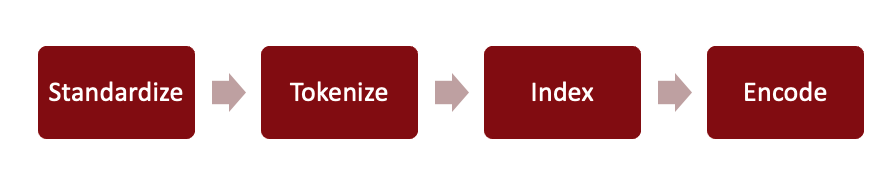

... is implemented by the `TextVectorization` layer. You can check out the documentation of `TextVectorization` [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization).

We first configure the layer by telling it what S, T, I, and E we want.

In our first example,
- we use the default standarization which will remove punctuation and covert to lowercase.
- we use the default tokenization at a word level, by setting `split='whitespace'`.
- we set the output mode to `multi_hot`

In [ ]:
# First, we set up our Text Vectorization layer using multi-hot encoding

max_tokens = 5000 # size of vocabulary space
text_vectorization = keras.layers.TextVectorization(
    max_tokens=max_tokens,
    ngrams=None, # default is 1 (1 word at a time)
    standardize='lower_and_strip_punctuation', # default
    split='whitespace', # default
    output_mode="multi_hot", # can also be count
)

text_vectorization.adapt(train_df['text'])

In [ ]:
text_vectorization.get_vocabulary()[:20] # ordered by frequency

['[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 'is',
 'for',
 'on',
 'was',
 'with',
 'it',
 'as',
 'he',
 'said',
 'by',
 'are',
 'at']

We then vectorize the train/test/validation sets using multi-hot encoding.

In [ ]:
#apply function to get multihot encodings
X_train = text_vectorization(train_df['text'])
X_val = text_vectorization(val_df['text'])
X_test = text_vectorization(test_df['text'])

Let's see how the `X_train` dataframe looks like:

In [ ]:
pd.DataFrame(X_train, columns=text_vectorization.get_vocabulary()).astype(int)

,[UNK],the,to,of,and,a,in,that,is,for,...,warnings,wanting,treating,sugar,successor,states”,southeast,sounded,singing,shifts
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10396,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10397,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10398,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


We initialize an NN with 1 hidden layer of 8 ReLU neurons and 1 output node with sigmoid activation (i.e. remember we are doing **binary** classification).

In [ ]:
#Each vector is of length 5000
#Each training example is a row of the table above.

inputs = keras.layers.Input(shape=(max_tokens, ), name='input')
x = keras.layers.Dense(8, activation="relu", name='hidden')(inputs)
outputs = keras.layers.Dense(1, activation="sigmoid", name='output')(x)
bow_model = keras.Model(inputs, outputs, name='simple_bow')

bow_model.summary()

Model: "simple_bow"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 8)                   │          40,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,017 (156.32 KB)

 Trainable params: 40,017 (156.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
bow_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model on the training set
bow_model.fit(x=X_train, y=y_train,
          validation_data=(X_val, y_val),
          epochs=10,
          batch_size=32)

Epoch 1/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8478 - loss: 0.3907 - val_accuracy: 0.9742 - val_loss: 0.0999
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9836 - loss: 0.0698 - val_accuracy: 0.9775 - val_loss: 0.0744
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9963 - loss: 0.0284 - val_accuracy: 0.9762 - val_loss: 0.0694
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9989 - loss: 0.0143 - val_accuracy: 0.9763 - val_loss: 0.0691
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9992 - loss: 0.0085 - val_accuracy: 0.9762 - val_loss: 0.0708
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9996 - loss: 0.0055 - val_accuracy: 0.9760 - val_loss: 0.0734
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9998 - loss: 0.0039 - val_accuracy: 0.9760 - val_loss: 0.0762
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.

In [ ]:
print('Test Accuracy is', bow_model.evaluate(X_test, y_test)[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0673
Test Accuracy is 0.9803845882415771


## Multi-hot encoding: Bigrams

Let's now try the exact same process but by using Bigrams (looking at pairs of words) instead of just Unigrams.

In [ ]:
text_vectorization_with_bigram = keras.layers.TextVectorization(
    ngrams=2, # This parameter determines that we want to use Bigrams
    max_tokens=20000, # We increase the maximum number of tokens to include bigrams
    standardize='lower_and_strip_punctuation',
    output_mode="multi_hot"
)

text_vectorization_with_bigram.adapt(train_df['text'])

# Use the text_vectorization layer to vectorize the train/test/validation set
X_train_bigram = text_vectorization_with_bigram(train_df['text'])
X_val_bigram = text_vectorization_with_bigram(val_df['text'])
X_test_bigram = text_vectorization_with_bigram(test_df['text'])

In [ ]:
text_vectorization_with_bigram.get_vocabulary()[:20]

['[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 'is',
 'for',
 'on',
 'was',
 'with',
 'it',
 'as',
 'of the',
 'he',
 'said',
 'by',
 'in the']

We can now create a neural network and fit it into our training set. Note that we use exactly the same NN as before, and the only change is in the size of the input layer.

In [ ]:
# Initialize the model (same as before)
inputs = keras.layers.Input(shape=(20000, ))
x = keras.layers.Dense(8, activation="relu")(inputs)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model_bigram = keras.Model(inputs, outputs)

# Compile the model using binary_crossentropy
model_bigram.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model on the training set
model_bigram.fit(x=X_train_bigram, y=y_train,
          validation_data=(X_val_bigram, y_val),
          epochs=10,
          batch_size=32)


Epoch 1/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7881 - loss: 0.5300 - val_accuracy: 0.9694 - val_loss: 0.3218
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9860 - loss: 0.2835 - val_accuracy: 0.9717 - val_loss: 0.2503
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9976 - loss: 0.2085 - val_accuracy: 0.9712 - val_loss: 0.2093
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9994 - loss: 0.1627 - val_accuracy: 0.9740 - val_loss: 0.1774
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9997 - loss: 0.1303 - val_accuracy: 0.9758 - val_loss: 0.1535
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9997 - loss: 0.1060 - val_accuracy: 0.9763 - val_loss: 0.1355
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9997 - loss: 0.0874 - val_accuracy: 0.9763 - val_loss: 0.1210
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9997 - loss: 0.0727 - val_accu

We can now evaluate the accuracy on the test set.

In [ ]:
print('Test Accuracy is', model_bigram.evaluate(X_test_bigram, y_test)[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9810 - loss: 0.0901
Test Accuracy is 0.9811538457870483


## Count encoding: Bigrams

Here we just change the type of word encoding we use from **multi-hot** to **count**. Hence, now we are not only interested in whether a token occurs in the text or not, but we are also interested in how many times it occurs.

In [ ]:
text_vectorization_count = keras.layers.TextVectorization(
    ngrams=2, # This indicates that we want to use bigrams
    max_tokens=20000,
    standardize='lower_and_strip_punctuation',
    output_mode="count" # THIS is the only parameter we have changed
    )

text_vectorization_count.adapt(train_df['text'])

# Use the text_vectorization layer to vectorize the train/test/validation set
X_train_count = text_vectorization_count(train_df['text'])
X_val_count = text_vectorization_count(val_df['text'])
X_test_count = text_vectorization_count(test_df['text'])

pd.DataFrame(X_train_count, columns=text_vectorization_count.get_vocabulary())

,[UNK],the,to,of,and,a,in,that,is,for,...,has kept,harvest,had tried,had called,groups to,greenhouse,government but,get an,george bush,game in
0,548,49,17,18,15,17,15,11,6,9,...,0,0,0,0,0,0,0,0,0,0
1,907,82,36,39,31,21,16,23,19,17,...,0,0,1,0,0,0,0,0,0,0
2,125,9,6,6,2,9,1,3,2,3,...,0,0,0,0,0,0,0,0,0,0
3,1097,83,50,27,34,68,52,18,11,16,...,0,0,0,0,0,0,0,0,0,0
4,1172,82,51,30,27,30,20,29,15,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,303,18,12,9,10,10,11,3,3,7,...,0,0,0,0,0,0,0,0,0,0
10396,453,47,23,20,19,11,13,8,5,6,...,0,0,0,0,0,0,0,0,0,0
10397,243,29,16,13,5,9,2,10,4,4,...,0,0,0,0,0,0,0,0,0,0
10398,601,46,22,29,16,25,11,9,7,8,...,0,0,0,0,0,0,0,0,0,0


We again initialize and train the neural network exactly as before.

In [ ]:
# Initialize the model (same as before)
inputs = keras.layers.Input(shape=(20000, ))
x = keras.layers.Dense(8, activation="relu")(inputs)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model_count = keras.Model(inputs, outputs)

# Compile the model using binary_crossentropy
model_count.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model on the training set
model_count.fit(x=X_train_count, y=y_train,
          validation_data=(X_val_count, y_val),
          epochs=10,
          batch_size=32)

Epoch 1/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8213 - loss: 0.5705 - val_accuracy: 0.9715 - val_loss: 0.1295
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9822 - loss: 0.0899 - val_accuracy: 0.9771 - val_loss: 0.0898
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9954 - loss: 0.0401 - val_accuracy: 0.9785 - val_loss: 0.0822
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9984 - loss: 0.0196 - val_accuracy: 0.9783 - val_loss: 0.0797
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9938 - loss: 0.0363 - val_accuracy: 0.9763 - val_loss: 0.0811
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9998 - loss: 0.0075 - val_accuracy: 0.9775 - val_loss: 0.0808
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9999 - loss: 0.0046 - val_accuracy: 0.9790 - val_loss: 0.0808
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9999 - loss: 0.0035 - val_accu

Let's now evaluate the performance in the test set.

In [ ]:
print('Test Accuracy is', model_count.evaluate(X_test_count, y_test)[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9770 - loss: 0.0797
Test Accuracy is 0.9796153903007507


## Summary

* Multi + Unigrams Test Accuracy: 97.9%
* Multi + Bigrams Test Accuracy: 98.1%
* Count + Unigrams Test Accuracy: 97.6%